In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
#Read the dataset 

iris=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                 names=["sepal_len","sepal_width","petal_len","petal_width","class"])

In [6]:
#data understanding and preparation
iris.head()

,sepal_len,sepal_width,petal_len,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#checking if there is any null values
iris.isnull()

,sepal_len,sepal_width,petal_len,petal_width,class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [10]:
#describing data
iris.describe()

,sepal_len,sepal_width,petal_len,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
#shaping data
iris.shape

(150, 5)

In [13]:
#Info = Gives summary of data
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepal_len    150 non-null    float64
 1   sepal_width  150 non-null    float64
 2   petal_len    150 non-null    float64
 3   petal_width  150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
#Data Analysis
iris['class'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: class, dtype: int64

In [16]:
iris.columns

Index(['sepal_len', 'sepal_width', 'petal_len', 'petal_width', 'class'], dtype='object')

In [17]:
iris.values

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
       [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Iri

In [19]:
X=iris.iloc[:,:4]

In [20]:
X.head()

,sepal_len,sepal_width,petal_len,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
y=iris.iloc[:,-1]

In [22]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

In [26]:
#Data Normalization
X = preprocessing.StandardScaler().fit_transform(X)

In [29]:
X[0:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [31]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=1)
y_test.shape

(60,)

In [32]:
#Training and Predicting
knnmodel=KNeighborsClassifier(n_neighbors=3)

In [33]:
knnmodel.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:

y_predict1=knnmodel.predict(X_test)

In [35]:
#Accuracy

from sklearn.metrics import accuracy_score

In [36]:
acc=accuracy_score(y_test,y_predict1)

In [37]:
acc

0.9833333333333333

In [38]:
#Confusion Metrics
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test.values,y_predict1)

In [39]:
cm

array([[19,  0,  0],
       [ 0, 21,  0],
       [ 0,  1, 19]], dtype=int64)

In [40]:
cm1=pd.DataFrame(data=cm,index=['setosa','versicolor','virginica'],columns=['setosa','versicolor','virginica'])

In [41]:
cm1

,setosa,versicolor,virginica
setosa,19,0,0
versicolor,0,21,0
virginica,0,1,19


In [42]:
#Output Visualization
prediction_output=pd.DataFrame(data=[y_test.values,y_predict1],index=['y_test','y_predict1'])

In [43]:
prediction_output.transpose()

,y_test,y_predict1
0,Iris-setosa,Iris-setosa
1,Iris-versicolor,Iris-versicolor
2,Iris-versicolor,Iris-versicolor
3,Iris-setosa,Iris-setosa
4,Iris-virginica,Iris-virginica
5,Iris-versicolor,Iris-versicolor
6,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
9,Iris-virginica,Iris-virginica


In [44]:
prediction_output.iloc[0,:].value_counts()

Iris-versicolor    21
Iris-virginica     20
Iris-setosa        19
Name: y_test, dtype: int64

In [45]:
#value of K
Ks=50
mean_acc=np.zeros((Ks-1))


#train and predict
for n in range(1,Ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=accuracy_score(y_test,yhat)

In [46]:
print(mean_acc)

[0.96666667 0.96666667 0.98333333 0.96666667 0.95       0.96666667
 0.95       0.96666667 0.95       0.96666667 0.93333333 0.96666667
 0.93333333 0.96666667 0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 0.91666667 0.95       0.95       0.95
 0.95       0.95       0.93333333 0.95       0.93333333 0.93333333
 0.93333333 0.91666667 0.9        0.9        0.9        0.88333333
 0.9        0.88333333 0.86666667 0.86666667 0.86666667 0.86666667
 0.85       0.86666667 0.86666667 0.86666667 0.86666667 0.88333333
 0.86666667]


In [47]:

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.9833333333333333 with k= 3


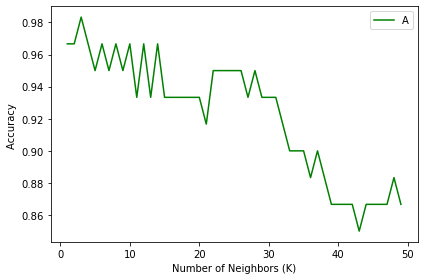

In [49]:
#Plotting
plt.plot(range(1,Ks),mean_acc,'g')
plt.legend(('Accuracy '))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()